# Text mining: Analyse 1 jaarverslag
Use the kernel `tmj` which I've made in the virtual environment `tmj`. This environment holds all the needed packages and so I can manage them without interfering with the system Python installation or other Python projects.

In [1]:
# Generic imports
import matplotlib.pyplot as plt
from os.path import join
from os import makedirs
import pandas as pd
import re

## Pdf to text

In [2]:
# Setup
filename = 'AEGON_2017.pdf'
folder = './jaarverslagen'
language = 'english'

In [3]:
# Parameters
filename = "KPN_2017.pdf"
folder = "./jaarverslagen"
language = "english"


In [4]:
# Setup output folder
filename_no_extension = re.search('(.*)\.pdf', filename).group(1)
output_folder = join('output', filename_no_extension)
makedirs(output_folder, exist_ok=True)

In [5]:
# Extract text (as bytes) from pdf
import textract
text = textract.process(join(folder, filename))
print(text.hex())

# Textract encodes as UTF-8, so decode back to text before proceding
text = text.decode('utf-8')

45766572796f6e650a436f6e6e65637465640a4b504e20496e74656772617465640a416e6e75616c205265706f727420323031370a0a0c436f6e74656e74730a0a4b504e206174206120676c616e63650a0a57686f2077652061726520616e64207768617420776520646f0a0a546865206c6f6e672d7465726d2076616c7565207765206372656174650a0a45766572796f6e6520636f6e6e65637465640a5765206d616b65206c696665206d6f726520667265652c2066756e20616e6420656173792062790a636f6e6e656374696e672070656f706c652e205765e2809972652070617373696f6e6174652061626f75740a6f66666572696e67207365637572652c2072656c6961626c6520616e64206675747572652d70726f6f660a6e6574776f726b7320616e642073657276696365732c20656e61626c696e672070656f706c6520746f2062650a636f6e6e656374656420616e7974696d652c20616e7977686572652c207768696c7374206174207468650a73616d652074696d65206372656174696e6720612070726f737065726f757320616e64206d6f72650a7375737461696e61626c6520776f726c642e0a0a616e6e697665727361727920696e20323031372c20636f6e6e656374732076756c6e657261626c652067726f7570730a696e20736f63696574792c207375636820

In [6]:
# Maybe decompose to get rid of the accents? Nah

## Bag of words

In [7]:
# Tokenize with the Natural Language Toolkit (nltk)
from nltk import word_tokenize
words = word_tokenize(text)
print(words)

['Everyone', 'Connected', 'KPN', 'Integrated', 'Annual', 'Report', '2017', 'Contents', 'KPN', 'at', 'a', 'glance', 'Who', 'we', 'are', 'and', 'what', 'we', 'do', 'The', 'long-term', 'value', 'we', 'create', 'Everyone', 'connected', 'We', 'make', 'life', 'more', 'free', ',', 'fun', 'and', 'easy', 'by', 'connecting', 'people', '.', 'We', '’', 're', 'passionate', 'about', 'offering', 'secure', ',', 'reliable', 'and', 'future-proof', 'networks', 'and', 'services', ',', 'enabling', 'people', 'to', 'be', 'connected', 'anytime', ',', 'anywhere', ',', 'whilst', 'at', 'the', 'same', 'time', 'creating', 'a', 'prosperous', 'and', 'more', 'sustainable', 'world', '.', 'anniversary', 'in', '2017', ',', 'connects', 'vulnerable', 'groups', 'in', 'society', ',', 'such', 'as', 'elderly', 'people', 'or', 'sick', 'children', ',', 'with', 'the', 'world', 'around', 'them', '.', 'In', 'our', 'online', 'annual', 'report', '(', 'www.kpn.com/annualreport', ')', ',', 'we', 'take', 'a', 'closer', 'look', 'at', 't

In [8]:
# Initialize the word cloud
from wordcloud import WordCloud
wc = WordCloud(
    font_path='/usr/share/fonts/gsfonts/NimbusSansNarrow-Bold.otf',\
    max_words=100,\
    background_color='white',\
    colormap='Oranges',\
    margin=10
)

def generateWordCloud(series):
    # To uppercase
    #FREQUENCIES = {k.upper(): v for k, v in frequencies.items()}
    SERIES = series.copy()
    SERIES.index = SERIES.index.str.upper()

    # Create the word cloud
    wordcloud = wc.generate_from_frequencies(SERIES)
    
    # Show it
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()
    
    # Return the word cloud to maybe save it
    return wordcloud

More about the word cloud: http://amueller.github.io/word_cloud/generated/wordcloud.WordCloud.html

In [9]:
# Run this after each text mining step
def countAndSave(words, suffix):
    # Count as bag of words and store as a pandas Series
    ser = pd.Series(words).value_counts()
    print(ser.head(10))

    # Save a CSV with the frequencies
    ser.to_csv(join(output_folder, filename_no_extension + suffix + '.csv'))

    # Create, show and save a word cloud
    wordcloud = generateWordCloud(ser)
    wordcloud.to_file(join(output_folder, filename_no_extension + suffix + '.png'));

the    3992
.      3166
and    2944
of     2879
,      2726
to     1822
in     1600
a      1046
KPN    1031
for     885
dtype: int64


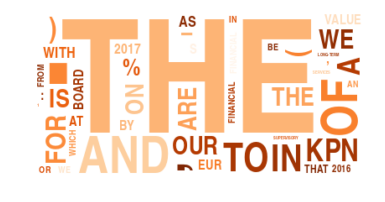

In [10]:
# Let's see
countAndSave(words, '_bag_of_words')

## Do some basic processing
* Ignore punctuation
* Ignore case
* Remove stopwords

In [11]:
# Convert all to lowercase
words = [w.lower() for w in words]

# Remove punctuation
words = [re.sub('[^A-Za-z0-9]', '', w) for w in words]
words = list(filter(None, words))

# Remove stopwords
from nltk.corpus import stopwords
words = [w for w in words if w not in stopwords.words(language)]

kpn           1060
financial      533
2017           531
value          459
board          432
eur            366
2016           324
management     302
report         269
1              230
dtype: int64


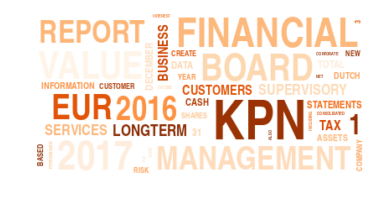

In [12]:
# Let's go!
countAndSave(words, '_basic_processing')